In [105]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


import seaborn as sns
import matplotlib.pyplot as plt


In [106]:
Data_set=pd.read_csv("Train data.csv")
print(Data_set)
if 'Credit_History' in Data_set.columns:
    Data_set['Credit_History'] = Data_set['Credit_History'].astype('object')

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849               0.00         NaN           

In [107]:
number_cols = Data_set.select_dtypes(exclude=['object']).columns.tolist()
#print(number_cols)
df=Data_set[number_cols]
#print(df)
imp_mean=SimpleImputer(missing_values=np.nan,strategy='mean')
imp_mean.fit(df)
df=imp_mean.transform(df)
df = pd.DataFrame(df, columns=number_cols)
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)
print(df.head())
#df.to_csv("cleaned_numeric_data.csv", index=False)




   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
0          5849.00               0.00      146.41            360.00
1          4583.00            1508.00      128.00            360.00
2          3000.00               0.00       66.00            360.00
3          2583.00            2358.00      120.00            360.00
4          6000.00               0.00      141.00            360.00


In [108]:
category_cols = Data_set.select_dtypes(include=['object']).columns.tolist()
dc=Data_set[category_cols]
#print(dc)
imp_mode=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imp_mode.fit(dc)
dc=imp_mode.transform(dc)

print(dc)

[['LP001002' 'Male' 'No' ... 1.0 'Urban' 'Y']
 ['LP001003' 'Male' 'Yes' ... 1.0 'Rural' 'N']
 ['LP001005' 'Male' 'Yes' ... 1.0 'Urban' 'Y']
 ...
 ['LP002983' 'Male' 'Yes' ... 1.0 'Urban' 'Y']
 ['LP002984' 'Male' 'Yes' ... 1.0 'Urban' 'Y']
 ['LP002990' 'Female' 'No' ... 0.0 'Semiurban' 'N']]


In [109]:
Data_set[number_cols]=df
Data_set[category_cols]=dc
print(Data_set)
#Data_set.to_csv("Cleaned.csv",index=False, encoding='utf-8', float_format='%.2f')

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0            5849.00               0.00      146.41           

In [110]:


normalizer=MinMaxScaler(feature_range=(0,1))
norm_data=normalizer.fit_transform(df)
df_norm = pd.DataFrame(norm_data, columns=df.columns, index=df.index)
Data_set[number_cols]=norm_data
print(Data_set)
#Data_set.to_csv("cleaned_normalize3.csv")



      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               0.07               0.00        0.20           

In [111]:
def detect_outliers_iqr(df, column):
    """Return outlier rows and boundaries using IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper

print("\n=== OUTLIER DETECTION RESULTS ===")


=== OUTLIER DETECTION RESULTS ===



📊 Column: ApplicantIncome
Lower bound: -0.02 | Upper bound: 0.12
Outliers detected: 50
     ApplicantIncome
9               0.16
34              0.15
54              0.14
67              0.13
102             0.17
106             0.14
115             0.18
119             0.13
126             0.29
128             0.13
130             0.25
138             0.18
144             0.14
146             0.18
155             0.49
171             0.64
183             0.42
185             0.48
191             0.15
199             0.13
254             0.20
258             0.18
271             0.14
278             0.18
284             0.25
308             0.25
324             0.18
333             0.78
369             0.24
370             0.19
409             1.00
424             0.18
432             0.16
438             0.13
443             0.46
467             0.20
475             0.20
478             0.20
483             0.13
487             0.22
493             0.21
506             0.26
509      

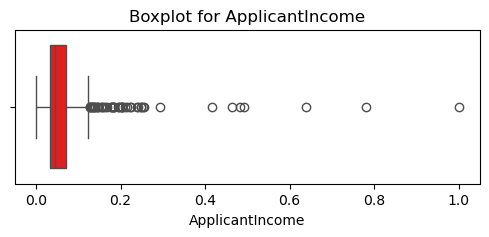


📊 Column: CoapplicantIncome
Lower bound: -0.08 | Upper bound: 0.14
Outliers detected: 18
     CoapplicantIncome
9                 0.26
12                0.19
38                0.17
122               0.22
135               0.19
177               0.27
180               0.17
253               0.17
349               0.15
372               0.19
402               0.48
417               0.48
444               0.20
506               0.16
513               0.16
523               0.17
581               0.81
600               1.00


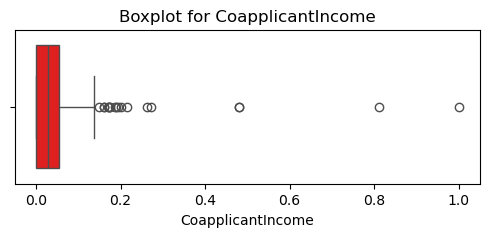


📊 Column: LoanAmount
Lower bound: -0.01 | Upper bound: 0.37
Outliers detected: 41
     LoanAmount
5          0.37
9          0.49
21         0.44
34         0.45
54         0.40
67         0.44
83         0.37
126        0.52
130        0.93
135        0.41
155        0.86
161        0.38
171        1.00
177        0.70
233        0.39
253        0.39
258        0.43
260        0.46
278        0.62
308        0.68
324        0.42
325        0.53
333        0.70
351        0.43
369        0.81
372        0.54
381        0.42
391        0.38
409        0.51
432        0.57
487        0.71
506        0.68
514        0.44
523        0.68
525        0.57
536        0.46
561        0.86
572        0.38
592        0.41
600        0.49
604        0.70


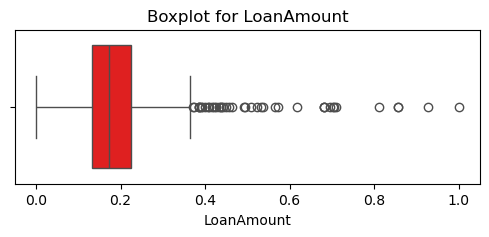

In [112]:
skip_cols = ['Loan_Amount_Term']
for col in number_cols:
    if col in skip_cols:
        #print(f"⏩ Skipping column: {col} (low variance or categorical-like)")
        continue
    if Data_set[col].nunique() > 5:  # only analyze columns with variation
        outliers, lower, upper = detect_outliers_iqr(Data_set, col)
        print(f"\n📊 Column: {col}")
        print(f"Lower bound: {lower:.2f} | Upper bound: {upper:.2f}")
        print(f"Outliers detected: {len(outliers)}")
    
    # Optional: show outlier rows (uncomment if you want to see details)
        print(outliers[[col]])
    
    # Visualization
        plt.figure(figsize=(6, 2))
        sns.boxplot(x=Data_set[col], color='red')
        plt.title(f"Boxplot for {col}")
        plt.show()

In [113]:


cat_cols = Data_set.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns before encoding:", cat_cols)

if 'Dependents' in Data_set.columns:
    Data_set['Dependents'] = Data_set['Dependents'].replace('3+', 3)
    Data_set['Dependents'] = pd.to_numeric(Data_set['Dependents'], errors='coerce')

binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status','Credit_History']

le = LabelEncoder()
for col in binary_cols:
    if col in Data_set.columns:
        Data_set[col] = le.fit_transform(Data_set[col])

multi_cols = ['Property_Area']
Data_set = pd.get_dummies(Data_set, columns=multi_cols, drop_first=True)

print("\nEncoding complete!")
print(Data_set.head())
print("\nData types after encoding:")
print(Data_set.dtypes)


Categorical columns before encoding: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

Encoding complete!
    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             0.07               0.00        0.20              0.74   
1             0.05               0.04        0.17              0.74   
2             0.04               0.00        0.08              0.74   
3             0.03               0.06        0.16              0.74   
4             0.07               0.00   

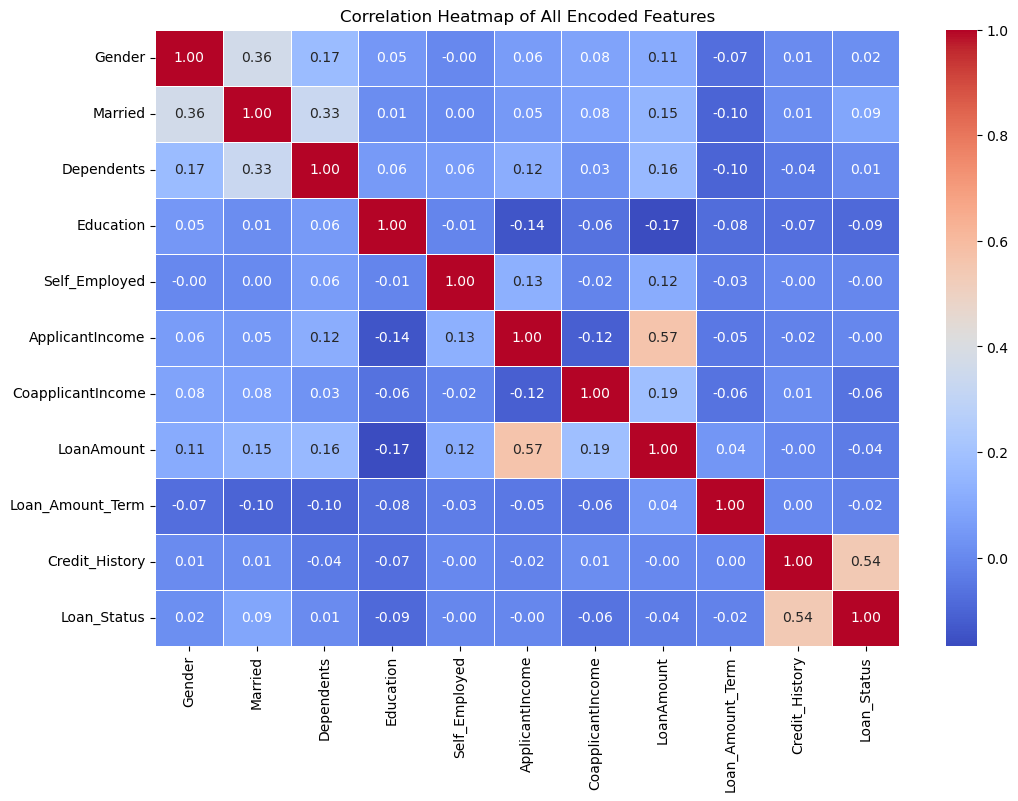

Correlation of features with Loan_Status:
Loan_Status          1.00
Credit_History       0.54
Married              0.09
Gender               0.02
Dependents           0.01
Self_Employed       -0.00
ApplicantIncome     -0.00
Loan_Amount_Term    -0.02
LoanAmount          -0.04
CoapplicantIncome   -0.06
Education           -0.09
Name: Loan_Status, dtype: float64


In [115]:
corr_matrix = Data_set.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of All Encoded Features")
plt.show()

target_corr = corr_matrix['Loan_Status'].sort_values(ascending=False)
print("Correlation of features with Loan_Status:")
print(target_corr)